# Global Video Games Sales 
This dataset provides insights into the global sales of video games across different platforms and genresVgsales

* Rank: Ranking of the game based on global sales. (Integer)
* Name: Name of the game. (String)
* Platform: Platform the game was released on. (String)
* Year: Year the game was released. (Integer)
* Genre: Genre of the game. (String)
* Publisher: Publisher of the game. (String)
* NA_Sales: Sales of the game in North America. (Float)
* EU_Sales: Sales of the game in Europe. (Float)
* JP_Sales: Sales of the game in Japan. (Float)
* Other_Sales: Sales of the game in other regions. (Float)
* Global_Sales: Total sales of the game worldwide. (Float)

# 1. Import dataset and libraries

In [245]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [222]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [246]:
#Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16290 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16290 non-null  int64  
 1   Name          16290 non-null  object 
 2   Platform      16290 non-null  object 
 3   Year          16290 non-null  int32  
 4   Genre         16290 non-null  object 
 5   Publisher     16290 non-null  object 
 6   NA_Sales      16290 non-null  float64
 7   EU_Sales      16290 non-null  float64
 8   JP_Sales      16290 non-null  float64
 9   Other_Sales   16290 non-null  float64
 10  Global_Sales  16290 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


# 1. Data Cleaning

In [224]:
#check NA value
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [225]:
# Remove all the NA values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [226]:
#Change the type of Year in the dataset
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [227]:
#Check duplicates in terms of Name, Platform and Year
df_duplicate_check = df[df.duplicated(subset=['Name','Platform', 'Year'], keep=False)]
df_duplicate_check

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
603,604,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.0,0.22,2.56
16127,16130,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01


In [228]:
# Remove duplicates
df = df.drop_duplicates(subset=['Name','Platform', 'Year'], keep='last')

#Double check the results
df[df.duplicated(subset=['Name','Platform', 'Year'], keep=False)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


# 2. Data Analytics and Visualization
2.1. Game Sales based on genres in each region

In [229]:
# Sales by genres in each region
genre_sales = df.groupby(["Genre"])[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", 'Global_Sales']].sum()
genre_sales


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Adventure,101.93,63.74,51.99,16.70,234.59
Fighting,220.74,100.00,87.15,36.19,444.05
Misc,396.92,211.77,106.67,73.92,789.87
Platform,445.99,200.65,130.65,51.51,829.13
Puzzle,122.01,50.52,56.68,12.47,242.21
Racing,356.93,236.31,56.61,76.68,726.76
Role-Playing,326.50,187.57,350.29,59.38,923.83
Shooter,575.16,310.45,38.18,101.90,1026.20


C:\Users\aki\AppData\Local\Temp\ipykernel_7232\149842937.py:6: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.


C:\Users\aki\AppData\Local\Temp\ipykernel_7232\149842937.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\aki\AppData\Local\Temp\ipykernel_7232\149842937.py:13: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.


C:\Users\aki\AppData\Local\Temp\ipykernel_7232\149842937.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\aki\AppData\Local\Temp\ipykernel_7232\149842937.py:20: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palett

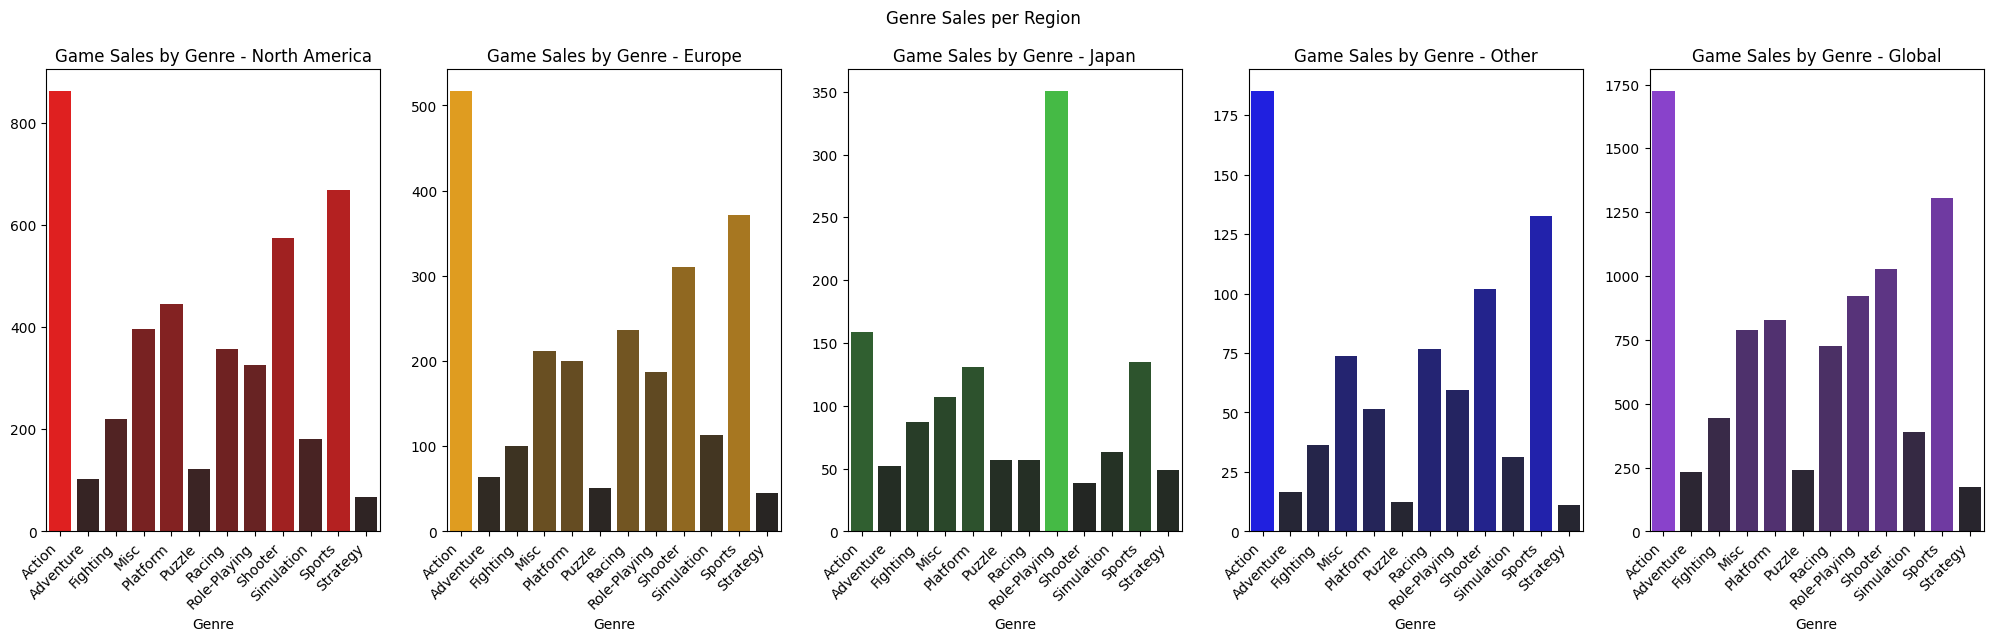

In [230]:
#Visualization
fig, axes = plt.subplots(1, 5, figsize=(25, 6))
fig.suptitle('Genre Sales per Region')

#North America
fig1 = sns.barplot(ax=axes[0], x=genre_sales.index, y=genre_sales['NA_Sales'].values, color = 'red', hue = genre_sales['NA_Sales'].values, dodge=False)
fig1.set_title('Game Sales by Genre - North America')
fig1.get_legend().remove()
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=45, horizontalalignment='right')
None

#EU
fig2 = sns.barplot(ax=axes[1], x=genre_sales.index, y=genre_sales['EU_Sales'].values, color = 'orange', hue = genre_sales['EU_Sales'].values, dodge=False)
fig2.set_title('Game Sales by Genre - Europe')
fig2.get_legend().remove()
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=45, horizontalalignment='right')
None

#Japan
fig3 = sns.barplot(ax=axes[2], x=genre_sales.index, y=genre_sales['JP_Sales'].values, color = 'limegreen', hue = genre_sales['JP_Sales'].values, dodge=False)
fig3.set_title('Game Sales by Genre - Japan')
fig3.get_legend().remove()
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=45, horizontalalignment='right')
None

#Other
fig4 = sns.barplot(ax=axes[3], x=genre_sales.index, y=genre_sales['Other_Sales'].values, color = 'blue', hue = genre_sales['Other_Sales'].values, dodge=False)
fig4.set_title('Game Sales by Genre - Other')
fig4.get_legend().remove()
fig4.set_xticklabels(fig4.get_xticklabels(), rotation=45, horizontalalignment='right')
None

#Global
fig5 = sns.barplot(ax=axes[4], x=genre_sales.index, y=genre_sales['Global_Sales'].values, color = 'blueviolet', hue = genre_sales['Global_Sales'].values, dodge=False)
fig5.set_title('Game Sales by Genre - Global')
fig5.get_legend().remove()
fig5.set_xticklabels(fig5.get_xticklabels(), rotation=45, horizontalalignment='right')
None

2.2. Game Sales based on each platform in each region

In [247]:
#North America
na_platform = df.groupby(['Platform'])[['NA_Sales']].sum().sort_values(['NA_Sales'], ascending = False).reset_index()
na_platform = na_platform.head(30)
#Visualization
fig_na_plat = px.bar(x=na_platform['Platform'], y = na_platform['NA_Sales'], color = na_platform['Platform'])
fig_na_plat.update_layout(title = 'Sales based on each platform in North America', xaxis_title = 'Platform', yaxis_title = 'Sales')


In North America region, it seems that X360 is the most famous platform for gamers, following by PS2 and Wii. 

In [232]:
#Japan
jp_platform = df.groupby(['Platform'])[['JP_Sales']].sum().sort_values(['JP_Sales'], ascending = False).reset_index()

#Visualization
fig_jp_plat = px.bar(x=jp_platform['Platform'], y = jp_platform['JP_Sales'], color = jp_platform['Platform'])
fig_jp_plat.update_layout(title = 'Sales based on each platform in Japan', xaxis_title = 'Platform', yaxis_title = 'Sales')

On the other hand, in Japan, DS is the most popular platform for games in this region, following by PS, PS, SNES and other Nintendos' platform. 

In [233]:
#global
global_platform = df.groupby(['Platform'])[['Global_Sales']].sum().sort_values(['Global_Sales'], ascending = False).reset_index()

#Visualization
fig_global_plat = px.bar(x=global_platform['Platform'], y = global_platform['Global_Sales'], color = global_platform['Platform'])
fig_global_plat.update_layout(title = 'Sales based on each platform in Global', xaxis_title = 'Platform', yaxis_title = 'Sales')


In general, looking at global view, PS2 is the most popular game platform for gamers in the world.

2.3. Trend in Game Genre

In [234]:
#Trend in game genre
global_sales = df.groupby(["Genre", 'Year'])[['Global_Sales']].sum().reset_index()
global_sales

#visualization
fig, axes = figsize=(20,20)
fig = px.line(global_sales, x=global_sales['Year'], y=global_sales['Global_Sales'], color=global_sales['Genre'], title='Trend in Game Genre')
fig.show()

2.4. Global sales based on Publisher

In [235]:
#Global sales based on Publisher
publisher_sales = df.groupby(["Publisher"])[['Global_Sales']].sum().sort_values(['Global_Sales'], ascending = False).reset_index()
publisher_sales = publisher_sales.head(30)

fig_global_publisher = px.bar(x=publisher_sales['Publisher'], y =publisher_sales['Global_Sales'], color =publisher_sales['Publisher'])
fig_global_publisher.update_layout(title='Global sales based on Publisher',
                  xaxis_title='Publisher',
                  yaxis_title='Global Sales (in millions)')
fig_global_publisher.show()

2.5. Top 10 game sales in Japan

2.5.1. Top 10 Game Sales in Japan of all time

In [236]:
#top 10 sales in Japan
jp_sales_10 = df.groupby(['Year', 'Name', 'Platform', 'Genre', 'Publisher'])[['JP_Sales']].sum().sort_values(['JP_Sales'], ascending = False)
jp_sales_10.head(10)


JP_Sales
Year Name                                        Platform Genre        Publisher          
1996 Pokemon Red/Pokemon Blue                    GB       Role-Playing Nintendo      10.22
1999 Pokemon Gold/Pokemon Silver                 GB       Role-Playing Nintendo       7.20
1985 Super Mario Bros.                           NES      Platform     Nintendo       6.81
2006 New Super Mario Bros.                       DS       Platform     Nintendo       6.50
     Pokemon Diamond/Pokemon Pearl               DS       Role-Playing Nintendo       6.04
2010 Pokemon Black/Pokemon White                 DS       Role-Playing Nintendo       5.65
2002 Pokemon Ruby/Pokemon Sapphire               GBA      Role-Playing Nintendo       5.38
2005 Animal Crossing: Wild World                 DS       Simulation   Nintendo       5.33
     Brain Age 2: More Training in Minutes a Day DS       Puzzle       Nintendo       5.32
2010 Monster Hunter Freedom 3                    PSP      Role-Playing Capcom         4.87

As can be seen, top Sales in JP are mostly games from Nintendo, which matches with DS, most popular platform in JP.

2.5.2. Top 10 Game Sales in Japan in the latest 5 years

In [237]:
#top 10 Sales in Japan in the latest 5 years
#check latest year
df['Year'].max()

2020

In [238]:
latest_5_year_df = df[(df['Year']>=2015) & (df['Year'] <= 2020)]
top_10_latest_JP = latest_5_year_df.groupby(['Year', 'Name', 'Platform', 'Genre', 'Publisher'])[['JP_Sales']].sum().sort_values(['JP_Sales'], ascending = False).reset_index()
top_10_latest_JP.head(15)

,Year,Name,Platform,Genre,Publisher,JP_Sales
0,2015,Monster Hunter X,3DS,Action,Capcom,2.78
1,2015,Yokai Watch Busters,3DS,Action,Level 5,2.28
2,2015,Splatoon,WiiU,Shooter,Nintendo,1.44
3,2015,Animal Crossing: Happy Home Designer,3DS,Simulation,Nintendo,1.39
4,2016,Yokai Watch 3,3DS,Action,Level 5,1.27
5,2015,Super Mario Maker,WiiU,Platform,Nintendo,0.93
6,2015,Dragon Quest VIII: Journey of the Cursed King,3DS,Role-Playing,Square Enix,0.86
7,2015,Monster Strike 3DS,3DS,Action,"mixi, Inc",0.86
8,2015,Rhythm Heaven: The Best+,3DS,Misc,Nintendo,0.71
9,2016,Dragon Quest Monsters Joker 3,3DS,Role-Playing,Square Enix,0.63


2.6. Nintendo Publisher's Sales

In [239]:
#Check sales/info of nintendo games
df_NX = df[df['Publisher'] == 'Nintendo']
df_NX


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


2.6.1. Nintendo Global Sales based on each genre

In [248]:
#check most popular genre
genre_NX = df_NX.groupby(['Genre', 'Platform'])[['Global_Sales']].sum().sort_values(['Global_Sales'], ascending = False).reset_index()

#visualization
fig_NX_genre = px.bar(x=genre_NX['Genre'], y =genre_NX['Global_Sales'], color = genre_NX['Platform'])
fig_NX_genre.update_xaxes(categoryorder='total descending')
fig_NX_genre.update_layout(title = 'Nintendo Global Sales based on each genre', xaxis_title = 'Genre', yaxis_title = 'Global sales (in million)')
fig_NX_genre.show()

2.6.2. Nintendo Global Sales based on each platform

In [249]:
#check platform of Nintendo's games
NX_platform = df_NX.groupby(['Platform', 'Genre'])[['Global_Sales']].sum().sort_values(['Global_Sales'], ascending = False).reset_index()

#visualization
fig_NX_platform = px.bar(x=NX_platform['Platform'], y =NX_platform['Global_Sales'], color = NX_platform['Genre'])
fig_NX_platform.update_xaxes(categoryorder='total descending')
fig_NX_platform.update_layout(title = 'Nintendo Global Sales based on each platform', xaxis_title = 'Genre', yaxis_title = 'Global sales (in million)')
fig_NX_platform.show()

2.7. Top Games with highest revenue of all time

In [242]:
df_test = df[df.duplicated(subset=['Name'], keep=False)]

#Check total global sales of each game
df_test_1=df_test.groupby(['Name'])[['Global_Sales']].sum().sort_values(['Name'], ascending=False)
df_game_sales = df_test.groupby(['Name', 'Platform'])[['Global_Sales']].sum().sort_values(['Name'], ascending=False)
test = pd.merge(df_game_sales, df_test_1, left_index=True, right_index=True).sort_values(['Global_Sales_y'], ascending=False)
df_game_sales=test.groupby(['Name','Global_Sales_y', 'Platform'])[['Global_Sales_x']].sum().sort_values(['Global_Sales_y'], ascending=False).reset_index().head(54)

In [243]:
#visualization
fig_game_sales = px.bar(x=df_game_sales['Name'], y=df_game_sales['Global_Sales_x'], color=df_game_sales['Platform'])
fig_game_sales.update_xaxes(categoryorder='total descending')
fig_game_sales.update_layout(title='Top Games with highest revenue of all time', xaxis_title='Game Titles', yaxis_title='Global Sales (in million)')
fig_game_sales.show()